# Install Libraries

In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install fancyimpute

  Using cached fancyimpute-0.7.0.tar.gz (25 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached knnimpute-0.1.0.tar.gz (8.3 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cvxpy-1.4.1-cp311-cp311-macosx_10_9_universal2.whl (1.4 MB)
  Using cached cvxopt-1.3.2-cp311-cp311-macosx_11_0_arm64.whl (11.1 MB)
  Using cached pytest-7.4.3-py3-none-any.whl (325 kB)
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  Using cached osqp-0.6.3.tar.gz (228 kB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [115 lines of output]
        Using cached oldest_supported_numpy-2023.10.25-py3-none-any.whl (4.9 kB)
        Using cached setuptools-68.2.2-py3-none-any.whl 

In [22]:
!pip install missingno


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import missingno
#from fancyimpute import IterativeImputer 

# Loading the dataset

In [7]:
data = pd.read_csv('./training.csv')

# Basic Data overview

In [8]:
print(data.shape)

(150000, 12)


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [10]:
print(data.describe())

          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                            

# EDA - Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

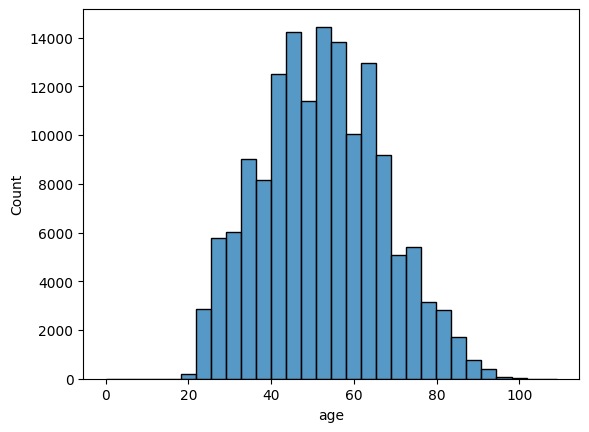

In [17]:
# Choose a few key features to visualize, for example, age, monthly income, etc.
sns.histplot(data['age'], bins=30)
plt.show

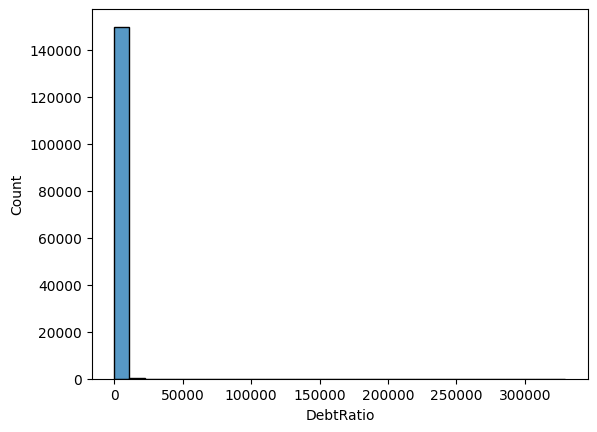

In [18]:
sns.histplot(data['DebtRatio'],bins=30)
plt.show()

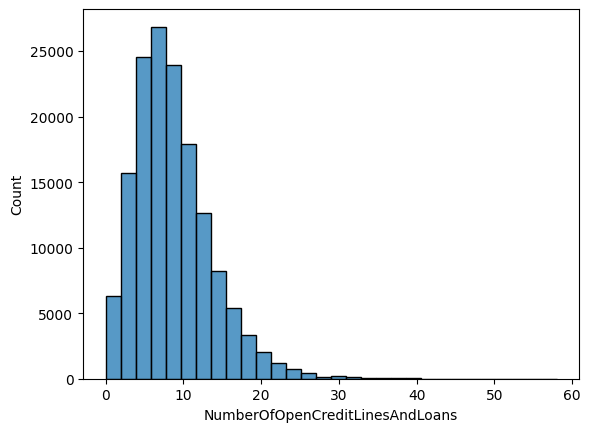

In [19]:
sns.histplot(data['NumberOfOpenCreditLinesAndLoans'],bins=30)
plt.show()

### Missing Values

In [20]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64


<Axes: >

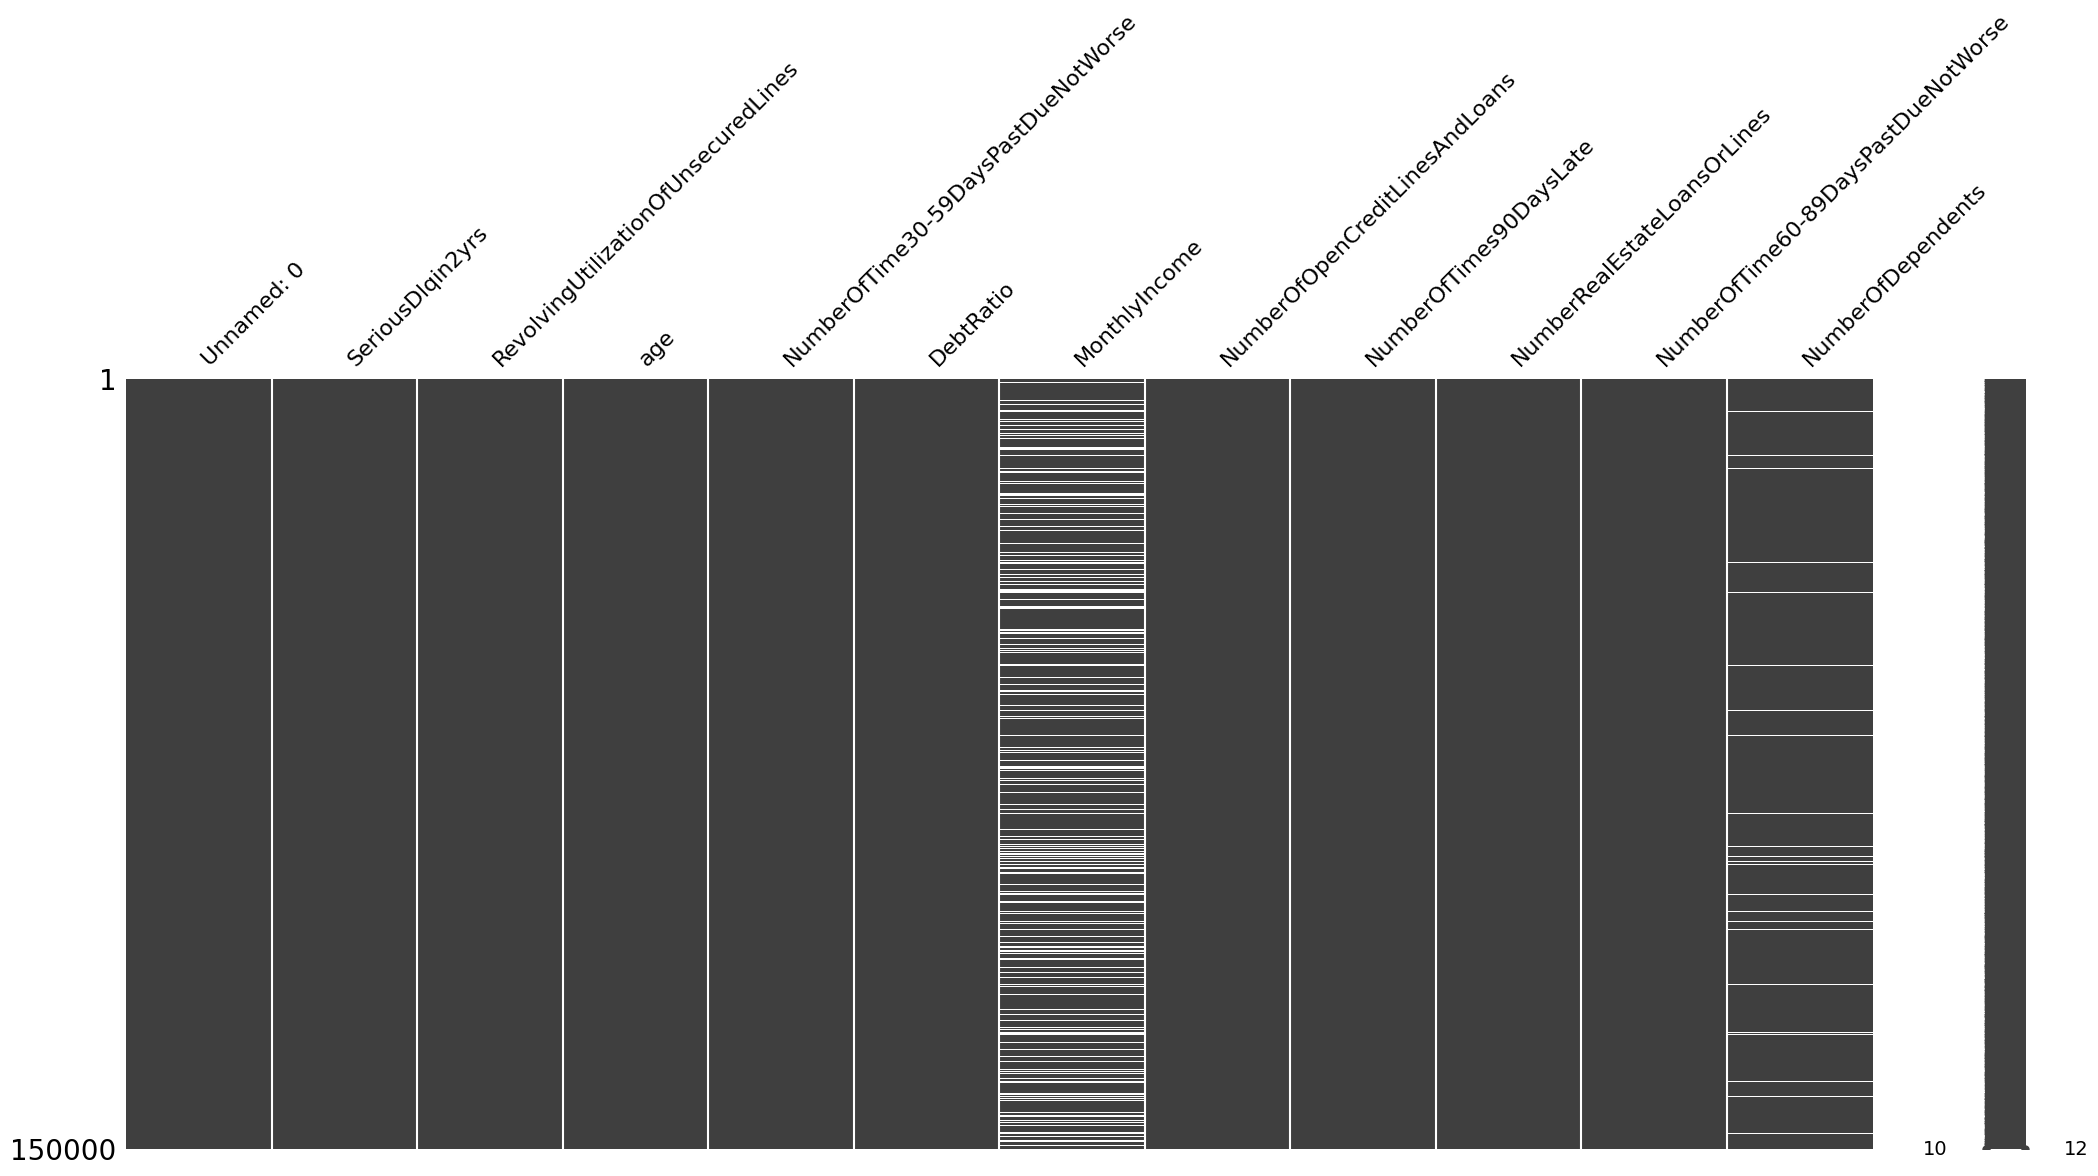

In [24]:
missingno.matrix(data)

### Correlation Analysis

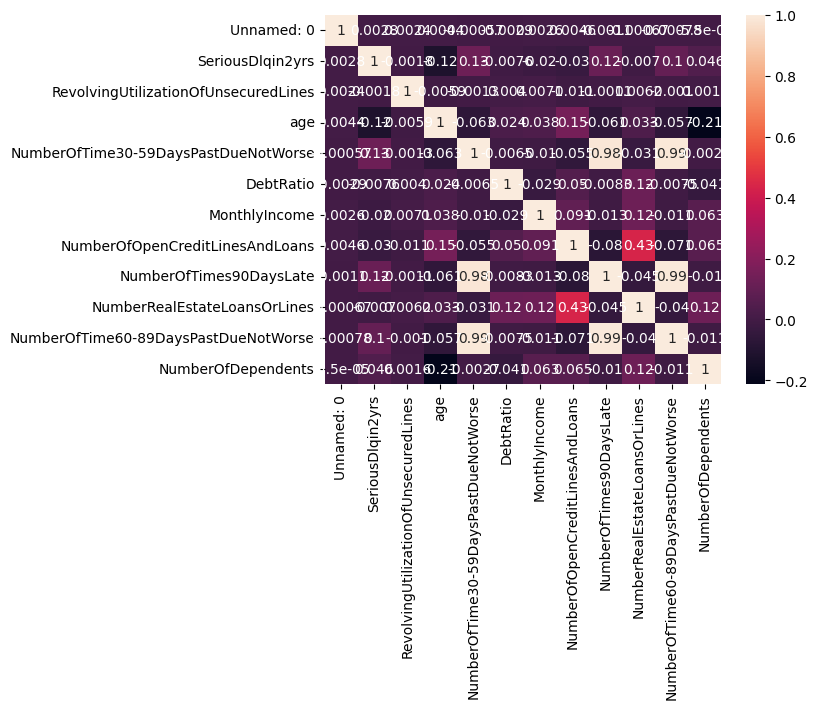

In [25]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Insights

- High Correlation:

NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, and NumberOfTime60-89DaysPastDueNotWorse have a high positive correlation with each other. This suggests that if a customer has been delinquent in one time period, they are likely to have been delinquent in another.

- Moderate Correlation:

NumberOfOpenCreditLinesAndLoans has a moderate positive correlation with NumberRealEstateLoansOrLines. This could indicate that people with more credit lines are also more likely to have real estate loans, which is reasonable as mortgages count as credit lines.

- Low to No Correlation:

Many variables, such as age with NumberOfDependents, show very low to no correlation. This implies there is no linear relationship between these variables, at least not one detectable by the Pearson correlation coefficient.

- Potential Data Issues:

The 'Unnamed: 0' column seems to be an index or identifier column with no meaningful correlation to other variables. It should be investigated and potentially removed if it serves no analytical purpose.

This variable does not seem to have a strong linear correlation with other variables, suggesting that the amount of credit the borrower is using relative to all available revolving credit is not linearly dependent on other numerical factors included in this dataset.

- Debt Ratio:

Surprisingly, DebtRatio does not show a strong correlation with the delinquency variables. It might be that the debt ratio is not a strong predictor for delinquency on its own in this dataset or that the relationship is not linear.

- Potential Multicollinearity:

The high correlation among the delinquency variables (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse) may indicate multicollinearity, which could be problematic for some types of models, such as linear regression. However, tree-based models like Random Forests and gradient boosting methods (like XGBoost) are generally more robust to multicollinearity.

Note: 
* Diagonal Elements:
The diagonal of the matrix is filled with 1s, which is expected as any variable has a perfect positive correlation with itself.
* I think that its good that there isn't much correlation among the variables, meaning that each will be presenting the modal with somewhat of a unique information

# Data Processing
Handling Missing Values

In [26]:
# TODO: Do better
simple_imp = SimpleImputer(strategy='mean')
data['MonthlyIncome'] = simple_imp.fit_transform(data[['MonthlyIncome']])

In [27]:
print(data.isnull().sum())

Unnamed: 0                                 0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
dtype: int64


<Axes: >

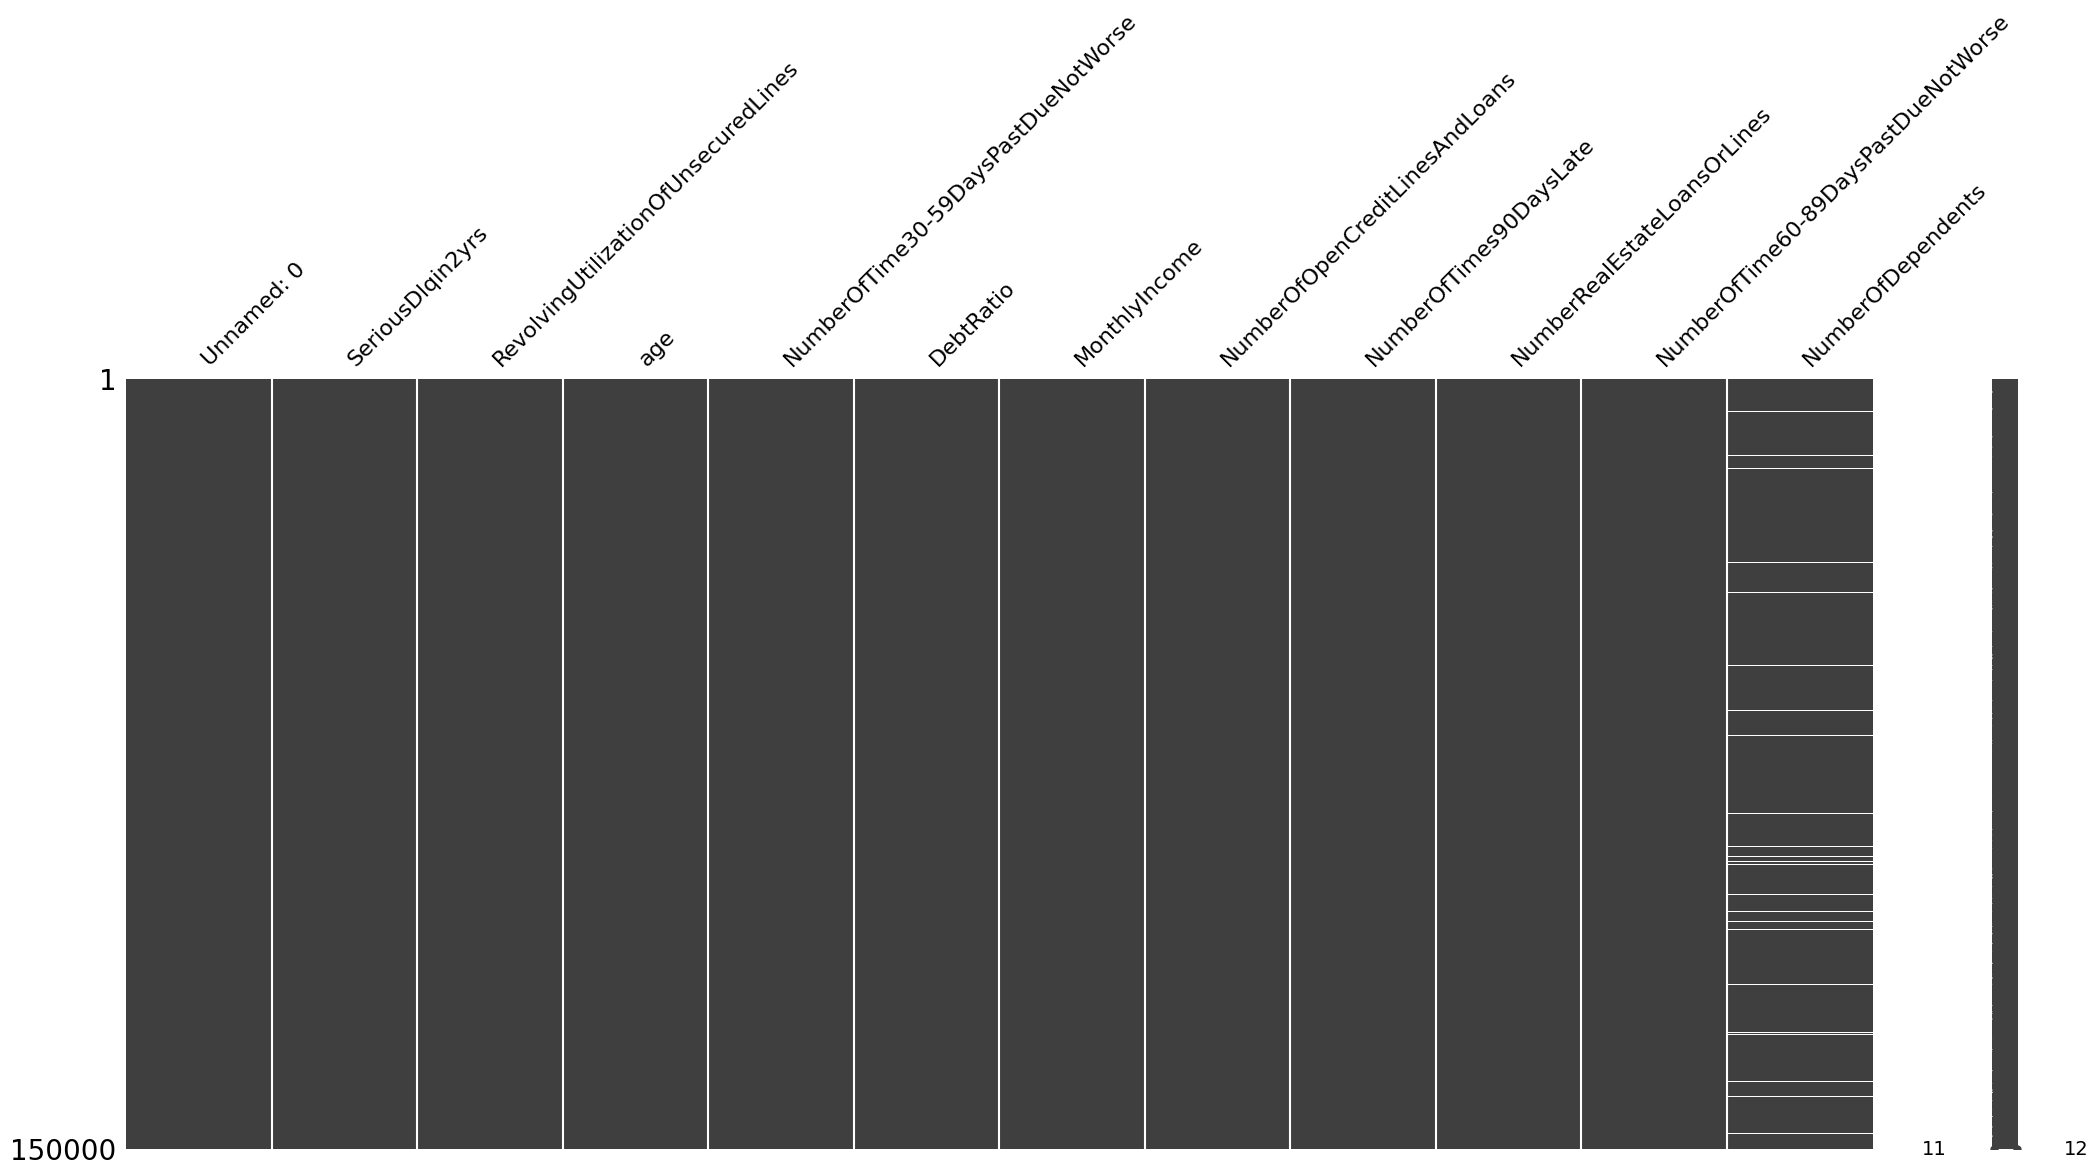

In [29]:
missingno.matrix(data)

Handling Outliers

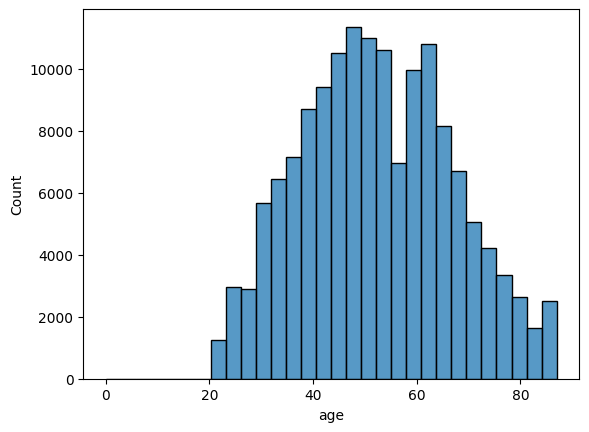

In [28]:
upper_limit = data['age'].quantile(0.99)
data['age'] = np.where(data['age'] > upper_limit, upper_limit, data['age'])

# Visualize again to confirm changes
sns.histplot(data['age'], bins=30)
plt.show()